In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

btc_cleaned = pd.read_parquet('../cache/btc_cleaned.parquet')
btc_cleaned.head()

,Timestamp,pct_change_15min,pct_change_30min,pct_change_24h
2019-01-01 00:00:00,1546300800,-0.033061,-0.226363,-2.433464
2019-01-01 00:15:00,1546301700,-0.193365,-2.578560,-1.891779
2019-01-01 00:30:00,1546302600,-2.389815,-1.509301,-1.775994
2019-01-01 00:45:00,1546303500,0.902072,0.781614,0.895776
2019-01-01 01:00:00,1546304400,-0.119382,-0.291943,0.356518


In [2]:
# get data for 24h frequency so that the data is not too dense
btc_cleaned_24h = btc_cleaned.resample('24h').asfreq()
btc_cleaned_24h.head()

,Timestamp,pct_change_15min,pct_change_30min,pct_change_24h
2019-01-01,1546300800,-0.033061,-0.226363,-2.433464
2019-01-02,1546387200,0.521951,0.445981,5.209942
2019-01-03,1546473600,-0.264935,-0.466494,-1.728571
2019-01-04,1546560000,-0.060791,-0.245014,-0.681653
2019-01-05,1546646400,-0.063337,0.142376,2.366366


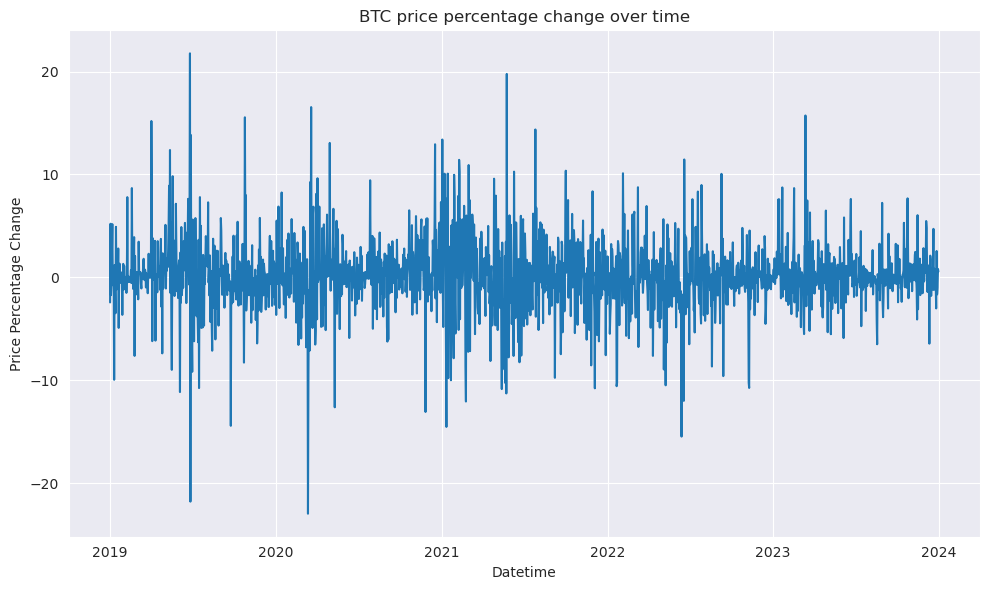

In [3]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = btc_cleaned_24h.index, y='pct_change_24h', data=btc_cleaned_24h)
plt.title('BTC price percentage change over time')
plt.tight_layout()
plt.xlabel('Datetime')
plt.ylabel('Price Percentage Change')
plt.show()


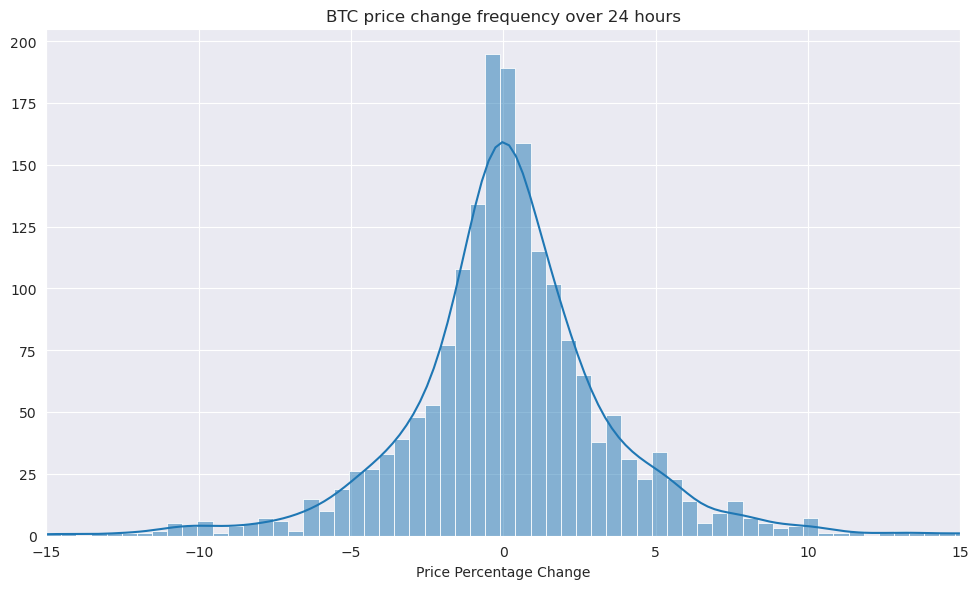

In [4]:
# plot the histogram of the percentage change
plt.figure(figsize=(10, 6))
sns.histplot(btc_cleaned['pct_change_24h'], kde=True)
plt.title('BTC price change frequency over 24 hours')
plt.tight_layout()
plt.xlabel('Price Percentage Change')
plt.ylabel(None)

plt.xlim(-15, 15)
plt.show()


In [5]:
# mean, mode, median, std, skewness, kurtosis
mean = btc_cleaned_24h['pct_change_24h'].mean()
median = btc_cleaned_24h['pct_change_24h'].median()
std = btc_cleaned_24h['pct_change_24h'].std()
skewness = btc_cleaned_24h['pct_change_24h'].skew()
kurtosis = btc_cleaned_24h['pct_change_24h'].kurtosis()

# percentage of data within 1, 2, 3 std
std_1 = btc_cleaned_24h[(btc_cleaned_24h['pct_change_24h'] > mean - std) & (btc_cleaned_24h['pct_change_24h'] < mean + std)].shape[0] / btc_cleaned_24h.shape[0] * 100
std_2 = btc_cleaned_24h[(btc_cleaned_24h['pct_change_24h'] > mean - 2*std) & (btc_cleaned_24h['pct_change_24h'] < mean + 2*std)].shape[0] / btc_cleaned_24h.shape[0] * 100
std_3 = btc_cleaned_24h[(btc_cleaned_24h['pct_change_24h'] > mean - 3*std) & (btc_cleaned_24h['pct_change_24h'] < mean + 3*std)].shape[0] / btc_cleaned_24h.shape[0] * 100

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"% of data within 1 std: {std_1}")
print(f"% of data within 2 std: {std_2}")
print(f"% of data within 3 std: {std_3}")

Mean: 0.19612544485898578
Median: 0.09756930823209228
Standard Deviation: 3.543238024890347
Skewness: 0.021637890226067307
Kurtosis: 5.280425086701488
% of data within 1 std: 77.8751369112815
% of data within 2 std: 94.14019715224534
% of data within 3 std: 98.24753559693319


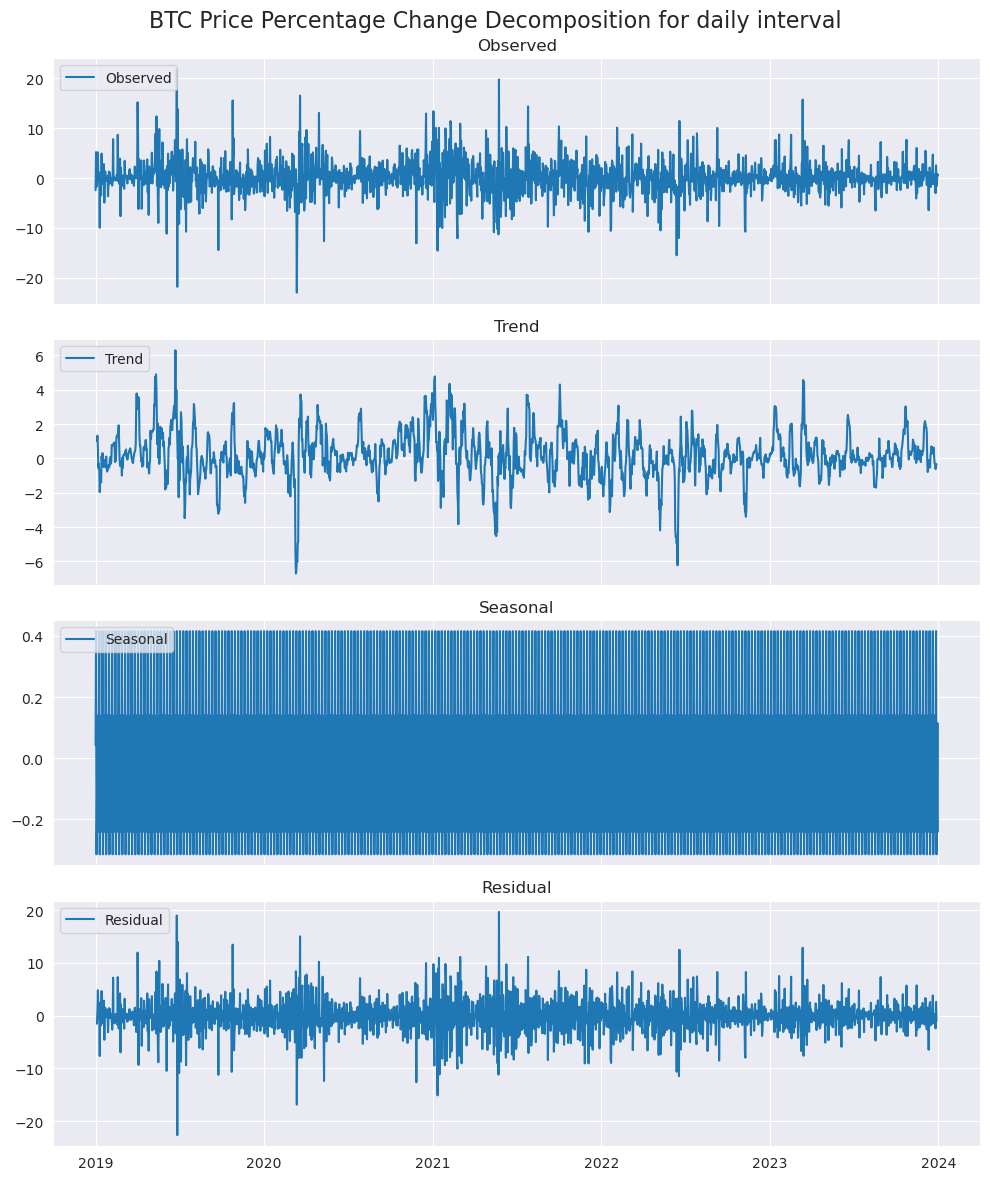

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(btc_cleaned_24h['pct_change_24h'], model='additive')
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot observed data
axes[0].plot(btc_cleaned_24h['pct_change_24h'], label='Observed')
axes[0].legend(loc='upper left')
axes[0].set_title('Observed')

# Plot trend component
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend')

# Plot seasonal component
axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal')

# Plot residual component
axes[3].plot(decomposition.resid, label='Residual')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual')

fig.suptitle('BTC Price Percentage Change Decomposition for daily interval', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


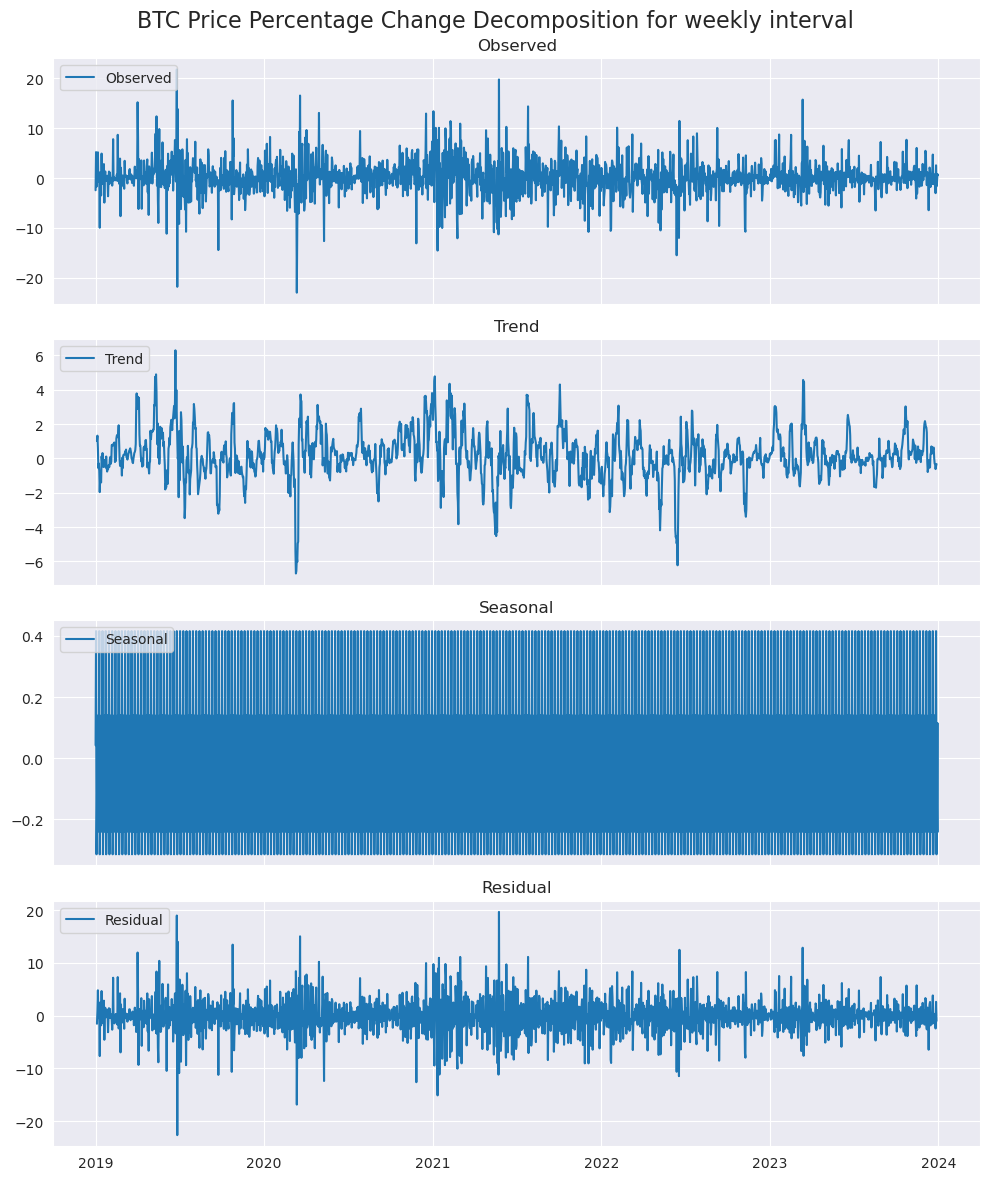

In [7]:
decomposition = seasonal_decompose(btc_cleaned_24h['pct_change_24h'], model='additive', period=7)
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot observed data
axes[0].plot(btc_cleaned_24h['pct_change_24h'], label='Observed')
axes[0].legend(loc='upper left')
axes[0].set_title('Observed')

# Plot trend component
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend')

# Plot seasonal component
axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal')

# Plot residual component
axes[3].plot(decomposition.resid, label='Residual')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual')

fig.suptitle('BTC Price Percentage Change Decomposition for weekly interval', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


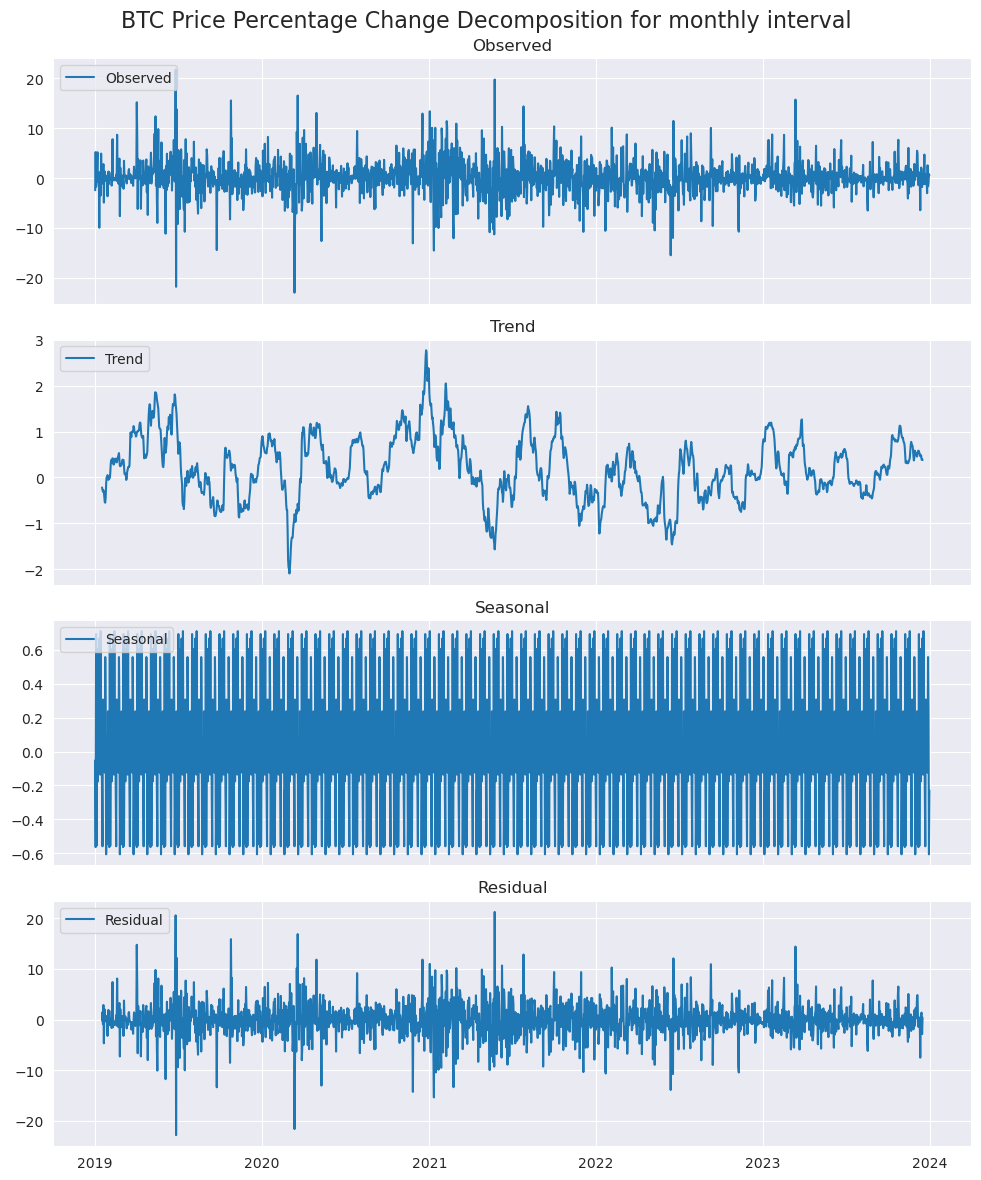

In [8]:
decomposition = seasonal_decompose(btc_cleaned_24h['pct_change_24h'], model='additive', period=30)
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot observed data
axes[0].plot(btc_cleaned_24h['pct_change_24h'], label='Observed')
axes[0].legend(loc='upper left')
axes[0].set_title('Observed')

# Plot trend component
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend')

# Plot seasonal component
axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal')

# Plot residual component
axes[3].plot(decomposition.resid, label='Residual')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual')

fig.suptitle('BTC Price Percentage Change Decomposition for monthly interval', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


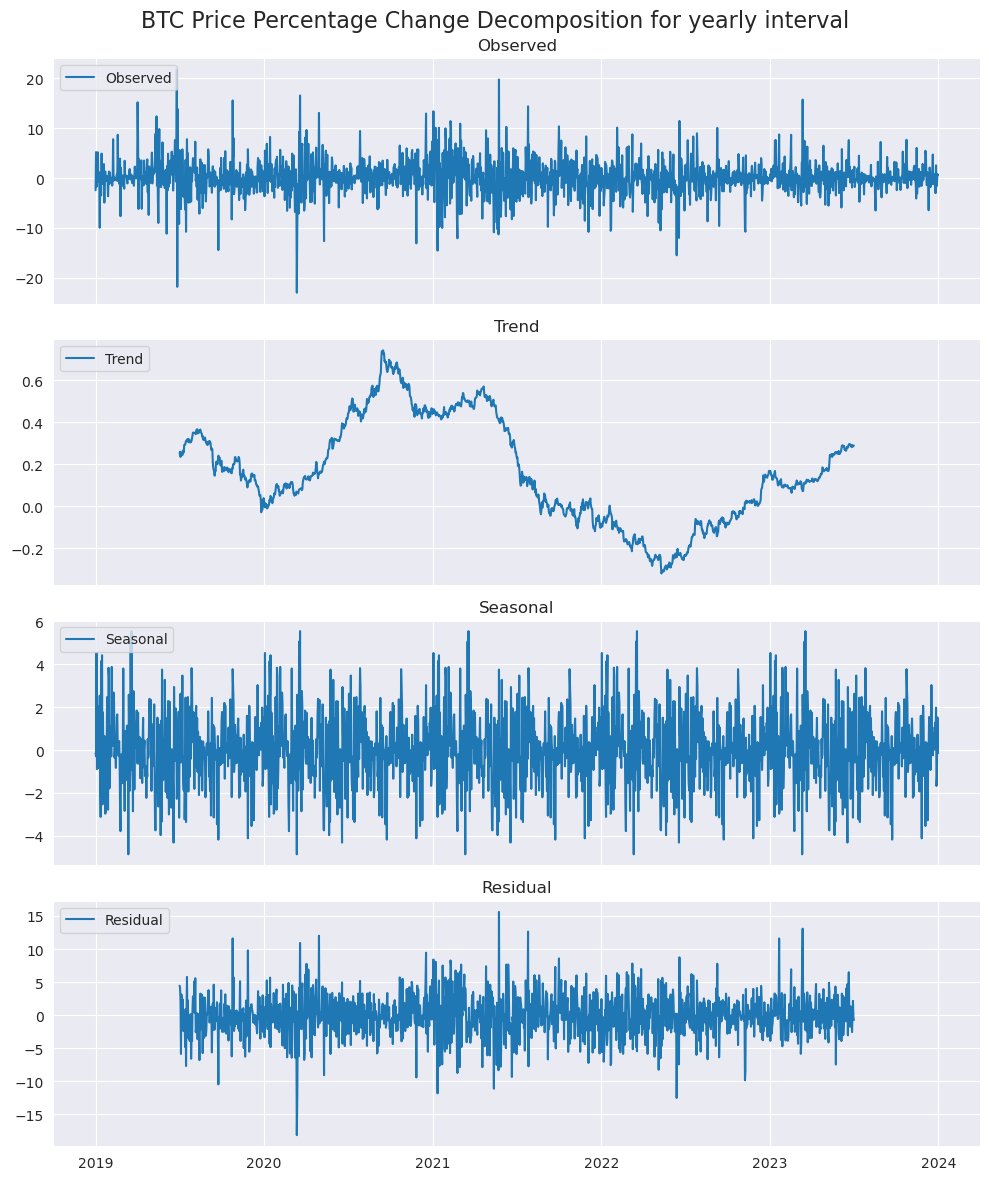

In [9]:
decomposition = seasonal_decompose(btc_cleaned_24h['pct_change_24h'], model='additive', period=365)
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot observed data
axes[0].plot(btc_cleaned_24h['pct_change_24h'], label='Observed')
axes[0].legend(loc='upper left')
axes[0].set_title('Observed')

# Plot trend component
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend')

# Plot seasonal component
axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal')

# Plot residual component
axes[3].plot(decomposition.resid, label='Residual')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual')

fig.suptitle('BTC Price Percentage Change Decomposition for yearly interval', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


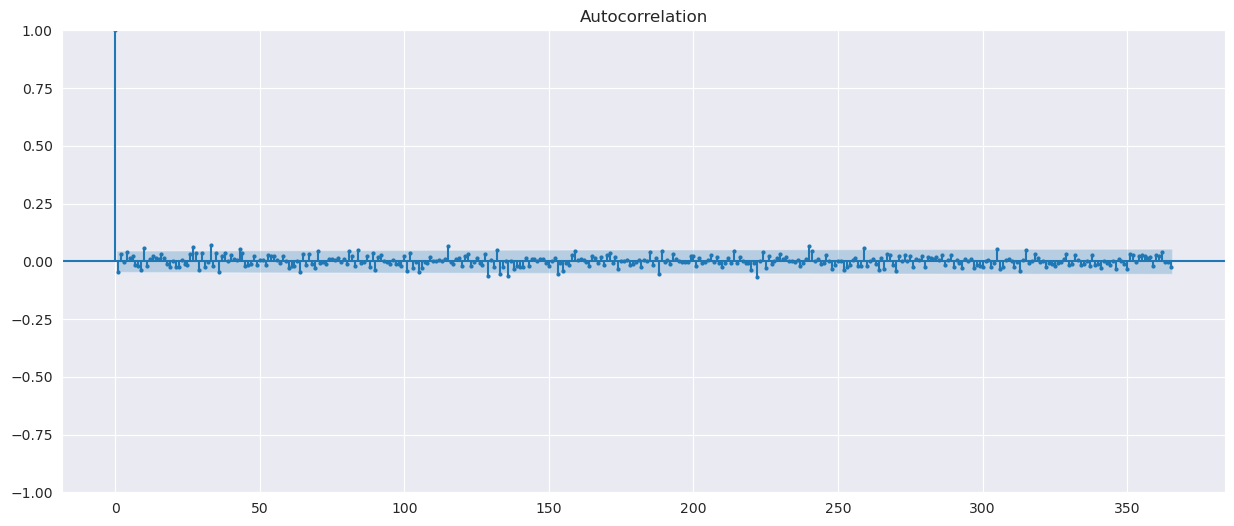

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(btc_cleaned_24h['pct_change_24h'], lags=365, markersize=2, ax=ax)  # Adjust the number of lags based on your data
plt.show()


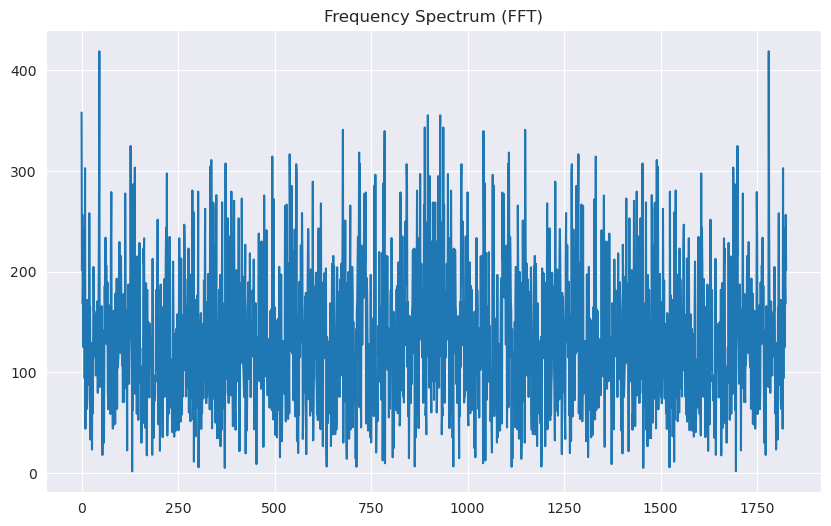

In [11]:
from numpy.fft import fft
import numpy as np

# Perform FFT
fft_result = fft(btc_cleaned_24h['pct_change_24h'])

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_magnitude)
plt.title("Frequency Spectrum (FFT)")
plt.show()


# Conclusion
the data apears to skew a bit for the price increase but overall price increase and decrease apear to be a bell curve . The data is not seasonal as the seasonal decomposition plot does not show any clear pattern. The data is not periodic as the ACF plot does not show any clear pattern. The FFT plot also doesn't show any clear paterns, because it hase alot of noise.